In [32]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
import torch
import requests
import json
import timeit
import os
import time

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, datasets,regularizers
from tensorflow.keras.applications import MobileNet,ResNet50
from tensorflow.keras.utils import load_img,img_to_array
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.layers.experimental.preprocessing import Resizing
from tensorflow.keras.optimizers import Adam
from transformers import DetrImageProcessor, DetrForObjectDetection,AutoImageProcessor, ResNetForImageClassification
from PIL import Image

# Clone YOLOv5

In [33]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -r requirements.txt  # install
%pip install -q roboflow


import torch
import os
from IPython.display import Image, display

print(f"setup complete.")

Cloning into 'yolov5'...
remote: Enumerating objects: 16818, done.
remote: Counting objects: 100% (139/139), done.
remote: Compressing objects: 100% (113/113), done.
remote: Total 16818 (delta 62), reused 68 (delta 26), pack-reused 16679
Receiving objects: 100% (16818/16818), 15.47 MiB | 28.86 MiB/s, done.
Resolving deltas: 100% (11541/11541), done.
/content/yolov5/yolov5
setup complete.


In [34]:
os.environ['DATASET_DIRECTORY'] = '/content/dataset'

In [35]:
from roboflow import Roboflow
rf = Roboflow(api_key="f3UrEtoPR6YueqfS6ab6")
project = rf.workspace("coinsdetections").project("coins_detection_and_counting")
version = project.version(4)
dataset = version.download("yolov5")

loading Roboflow workspace...
loading Roboflow project...
Exporting format yolov5pytorch in progress : 85.0%
Version export complete for yolov5pytorch format



Extracting Dataset Version Zip to /content/dataset/coins_detection_and_counting-4 in yolov5pytorch:: 100%|██████████| 636/636 [00:00<00:00, 3192.60it/s]


# Train The Model

In [36]:
#Train my model for 100 epochs
!python train.py --img 416 --batch 32 --epochs 100 --data {dataset.location}/data.yaml --weights yolov5s.pt --cache

2024-07-24 10:50:34.531947: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-24 10:50:34.532002: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-24 10:50:34.533774: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=/content/dataset/coins_detection_and_counting-4/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=32, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, dev

In [37]:
#seconde train on best wegiths for 50 epoochs
!python train.py --img 416 --batch 32 --epochs 50 --data {dataset.location}/data.yaml --weights runs/train/exp/weights/best.pt --cache

2024-07-24 10:56:53.199652: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-24 10:56:53.199705: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-24 10:56:53.200953: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=runs/train/exp/weights/best.pt, cfg=, data=/content/dataset/coins_detection_and_counting-4/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=32, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=ram, image

# Predection

In [57]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 416 --conf 0.1 --agnostic-nms --source {dataset.location}/valid/images

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/dataset/coins_detection_and_counting-4/valid/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=True, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-347-gd6112173 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
image 1/32 /content/dataset/coins_detection_and_counting-4/valid/images/5a6a057b-ido_27_jpg.rf.e0c04c3c70e48d5867295dd8899b4403.jpg: 416x416 1 1-shekel, 2 10-shekels, 1 2-shekel, 4 5-shekels, 7.0ms
image 2/32 /content/dataset/coins_detection_and_counting-4/valid/images/5b9463ba-IMG_3007_JP

# Display Images

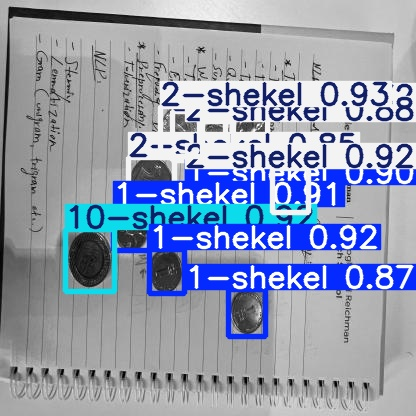

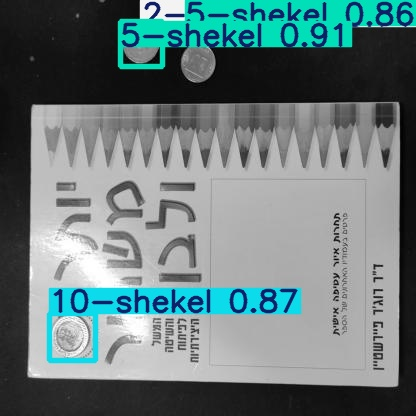

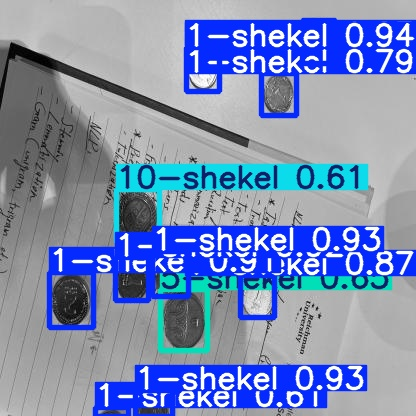

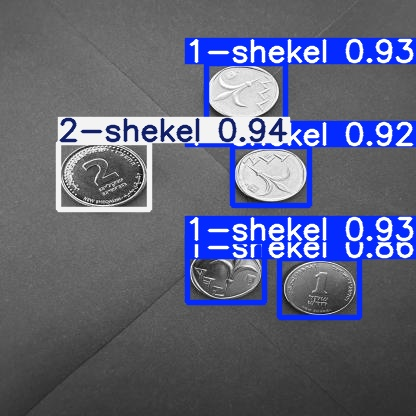

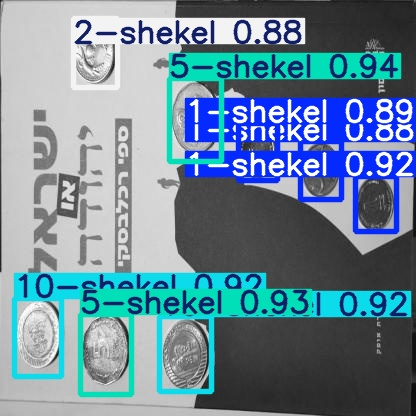

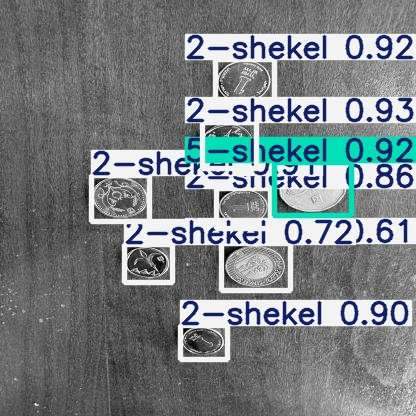

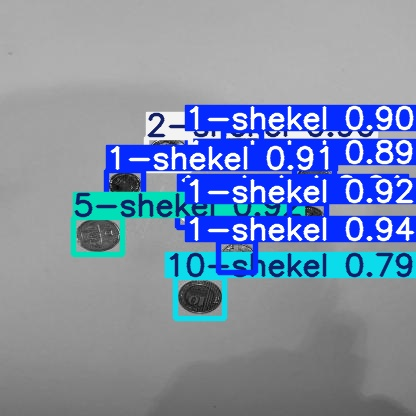

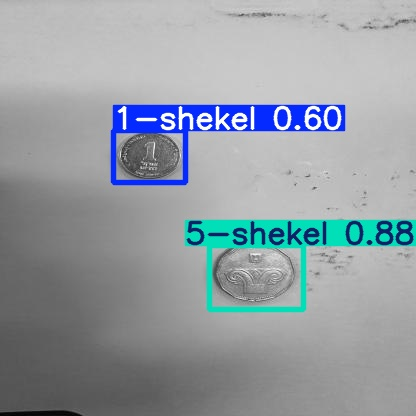

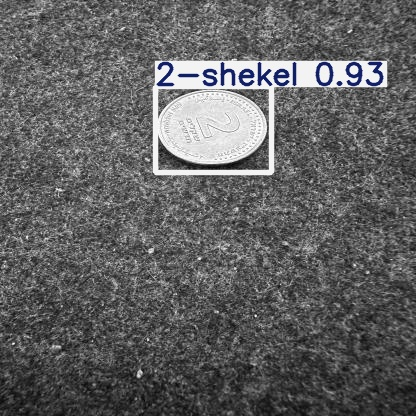

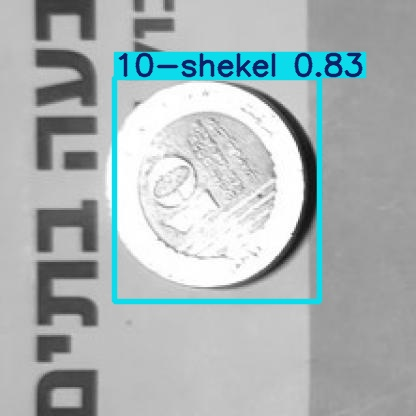

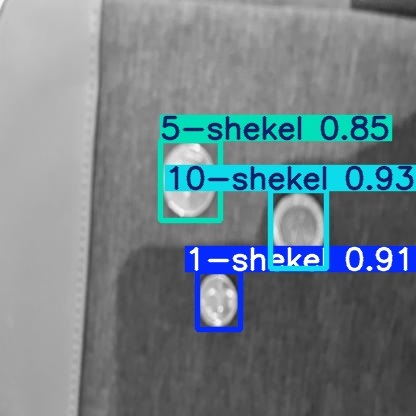

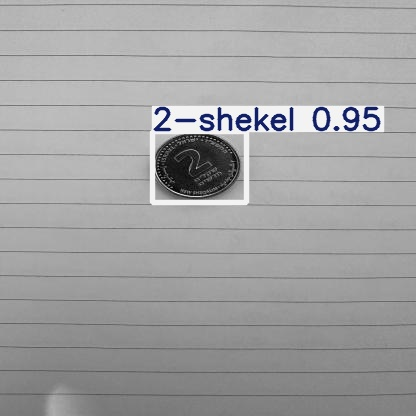

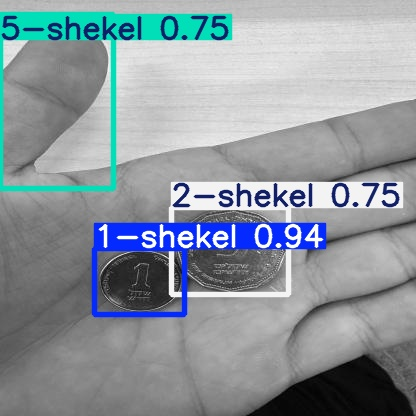

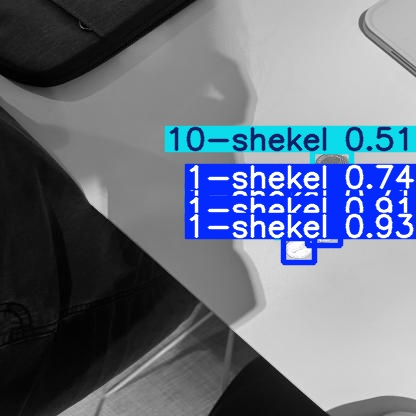

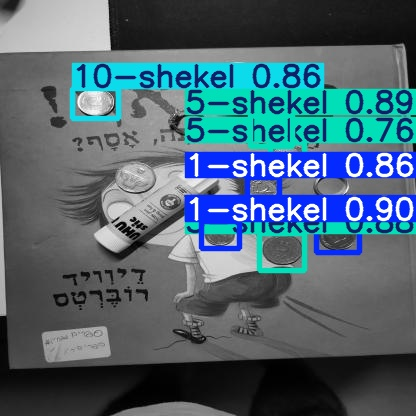

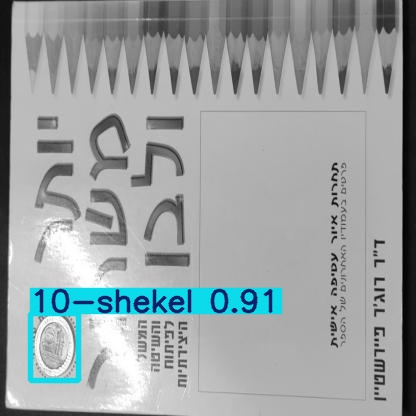

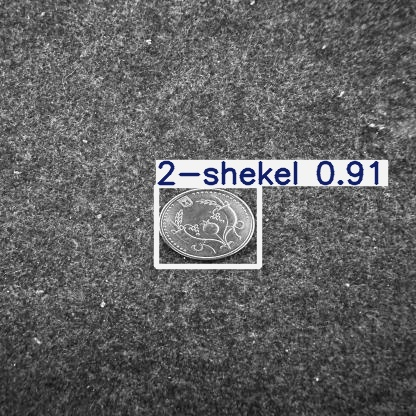

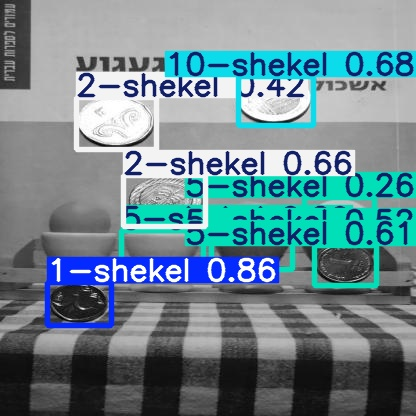

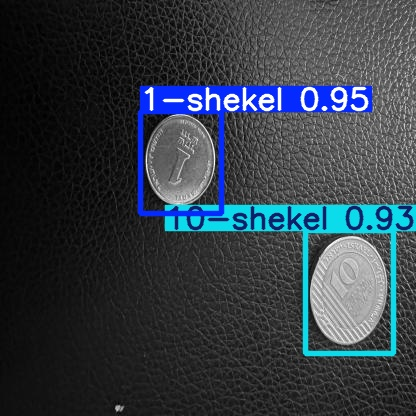

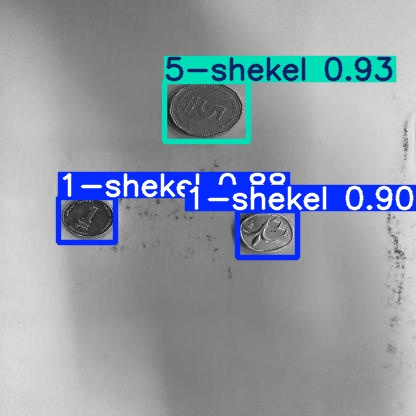

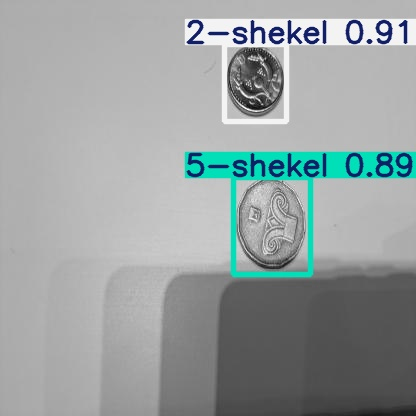

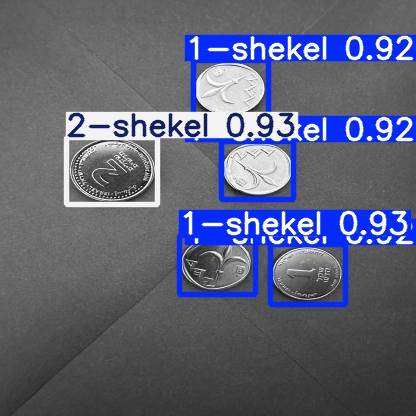

In [59]:
import glob
from IPython.display import Image, display

i = 0

image_path = "/content/yolov5/runs/detect/exp2/*.jpg"

for image_name in glob.glob(image_path):
    i += 1

    if i < 23:
        display(Image(filename=image_name))
        print("\n")

# Display confusion matrix

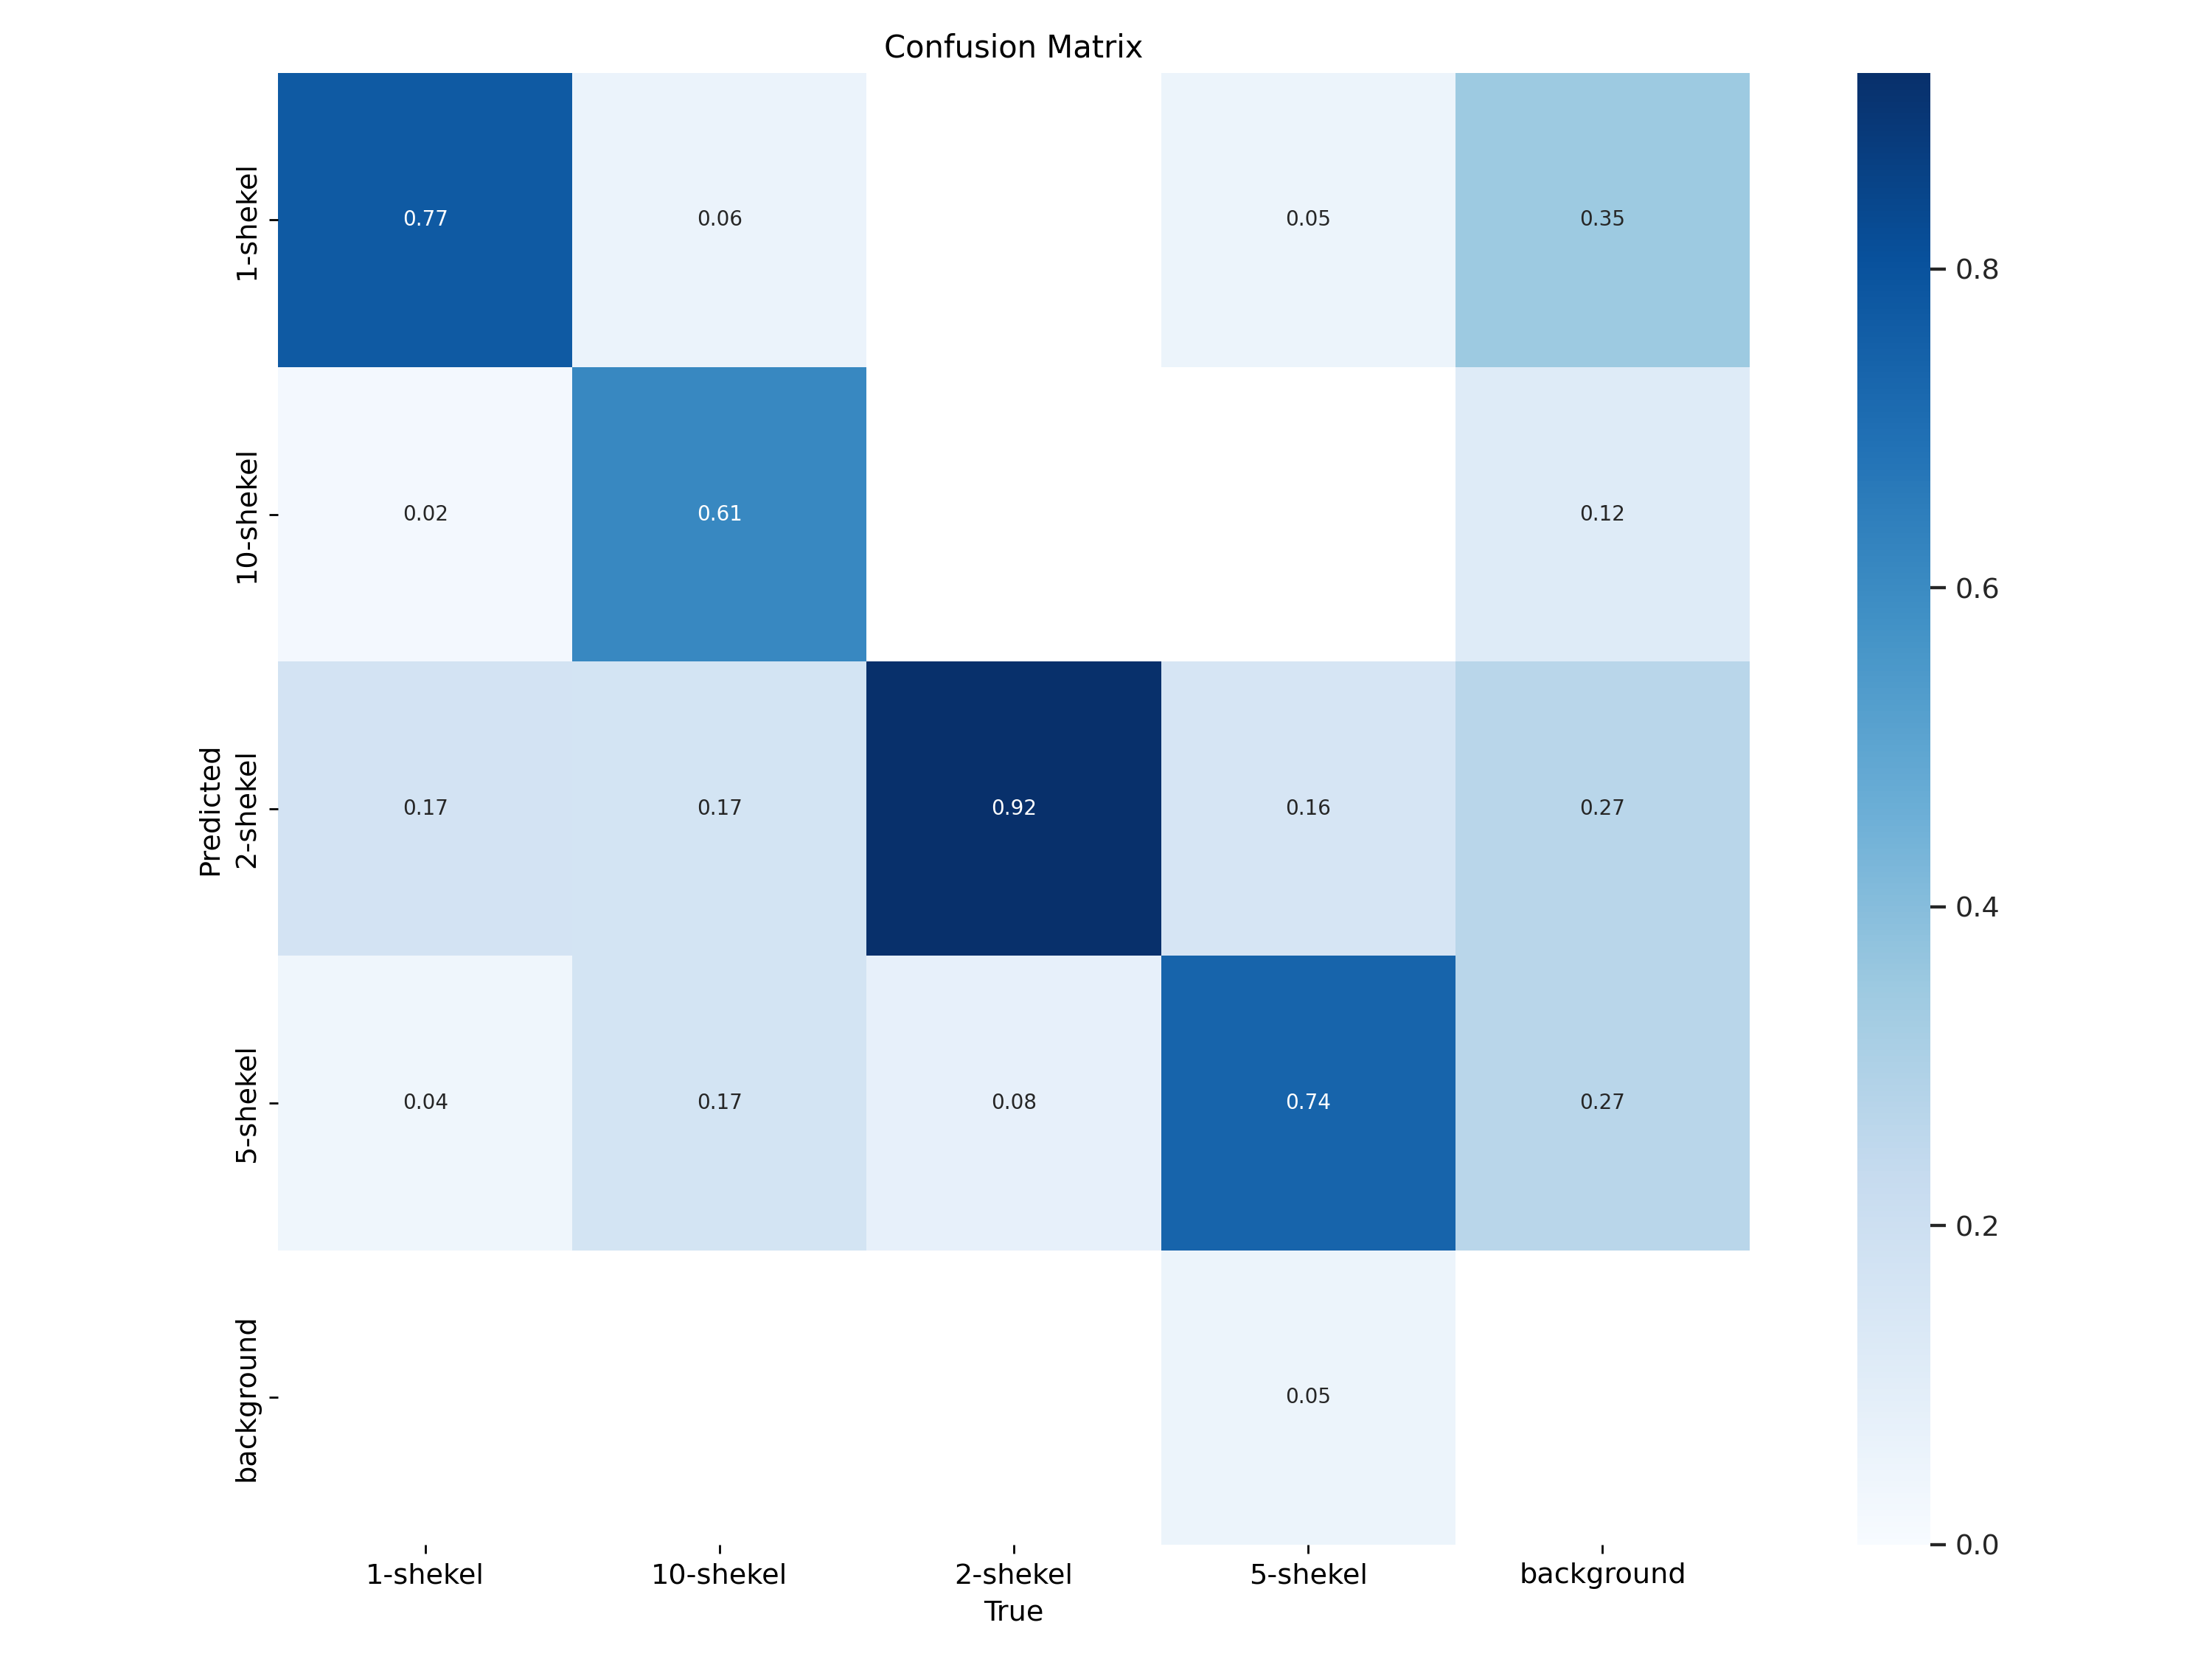

In [60]:
couf_matrix = '/content/yolov5/runs/train/exp/confusion_matrix.png'
display(Image(filename=couf_matrix))

# Display Results

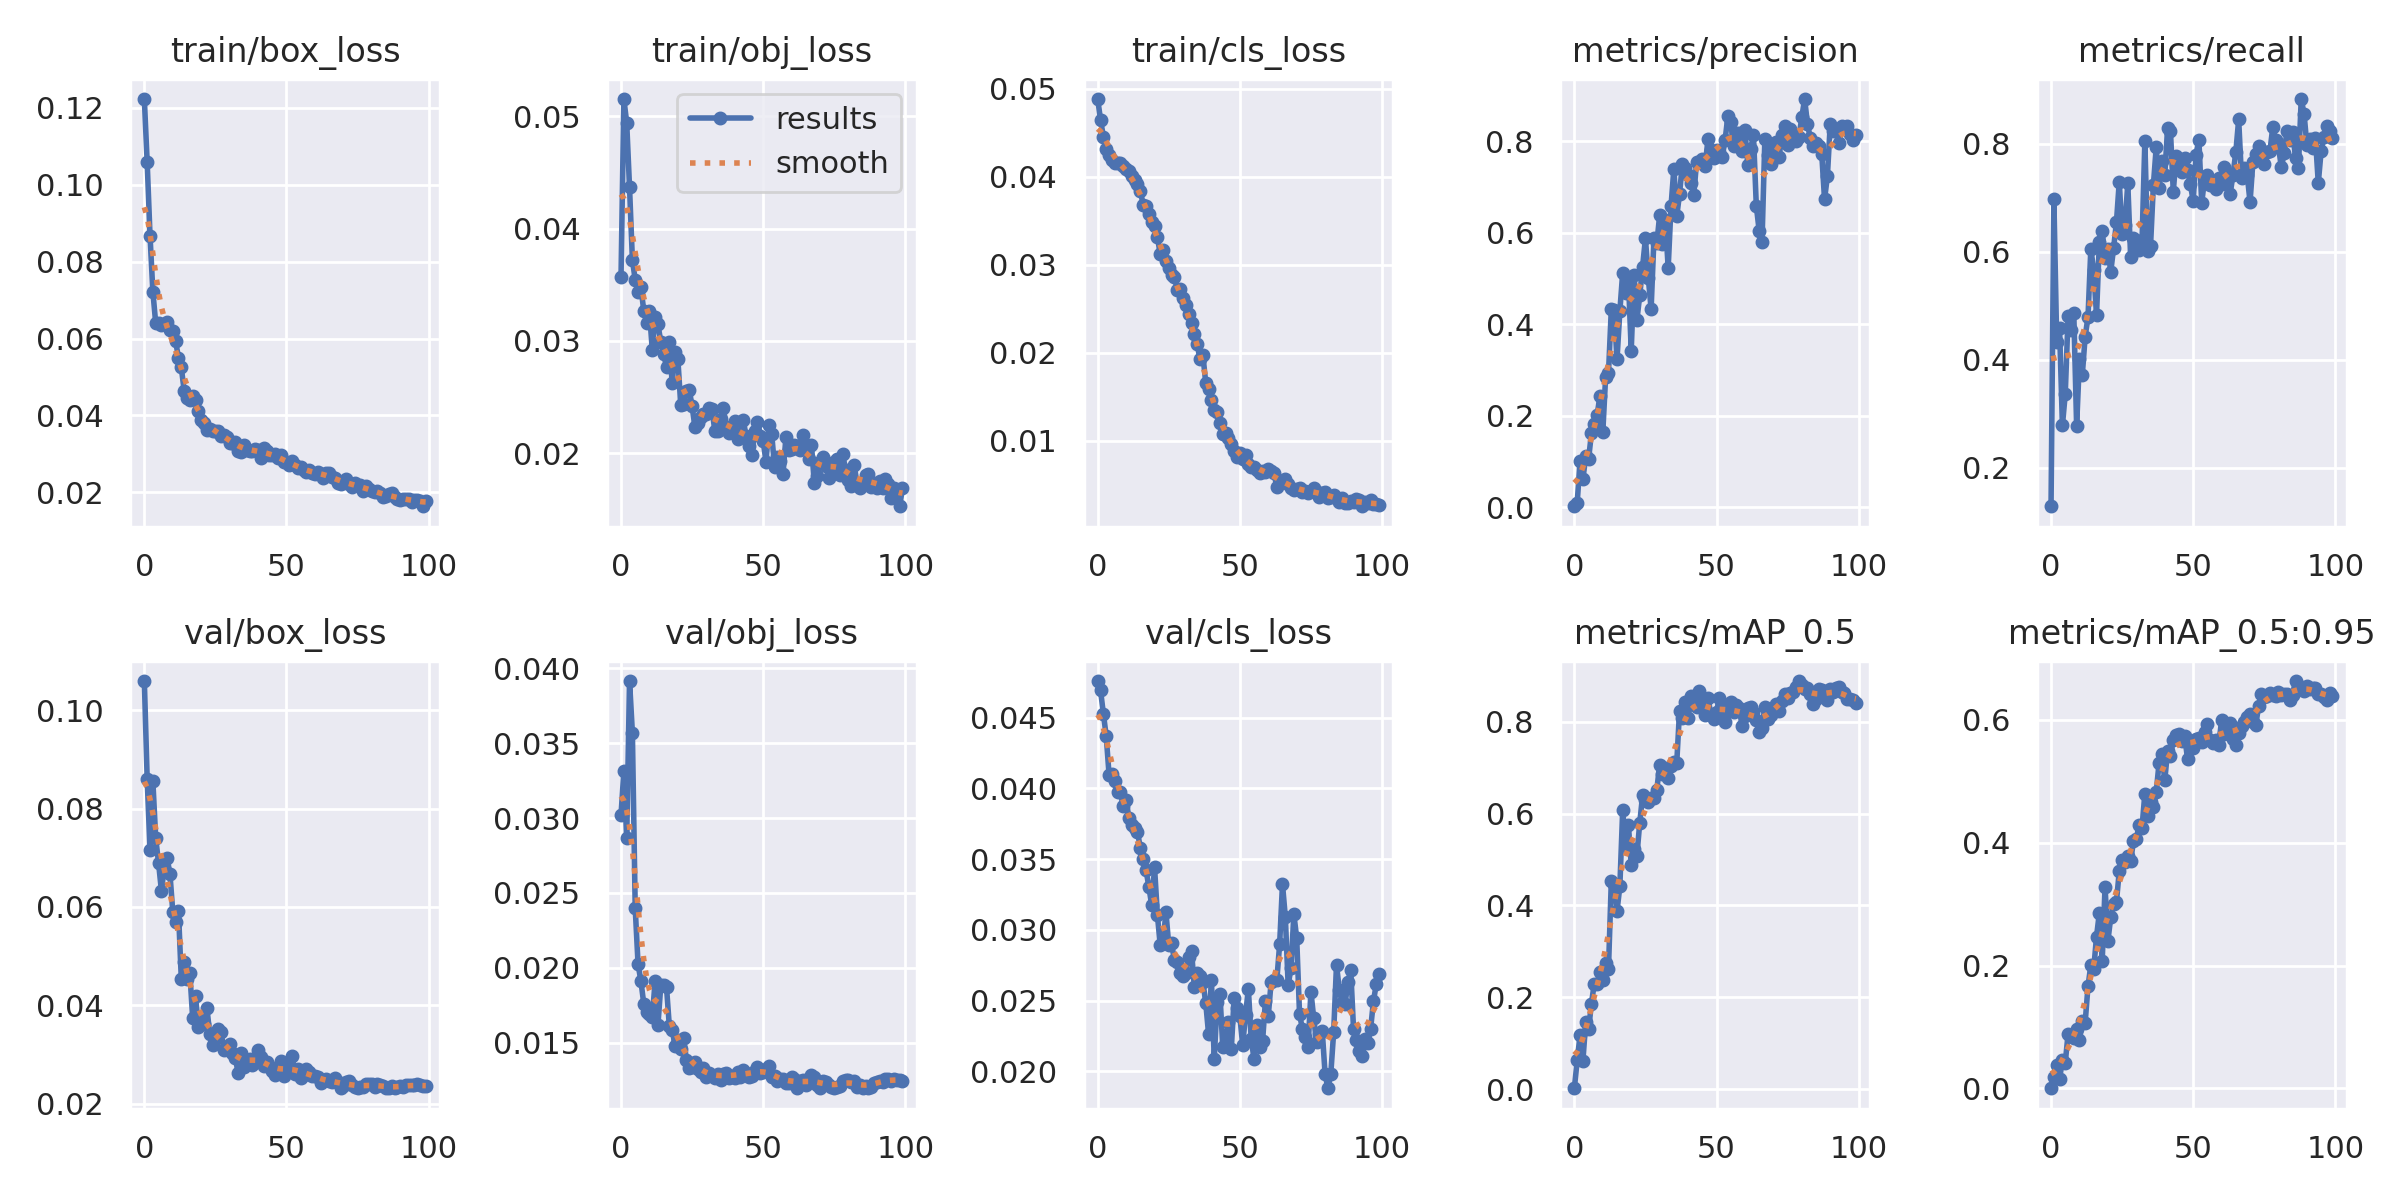

In [76]:
result_path = '/content/yolov5/runs/train/exp/results.png'
display(Image(filename=result_path))

#Calculate accuracy

In [70]:
# Function to calculate accuracy for one image
def calculate_accuracy(ground_truth,predicted):
    temp_accuracy = abs(ground_truth-predicted) / ground_truth
    if temp_accuracy >1:
      return 0
    return (1 - abs(ground_truth-predicted) / ground_truth)

In [42]:
# Function to calculate average accuracy over a dataset
def calculate_average_accuracy(predictions, ground_truths):
    accuracies = [calculate_accuracy(gt, pred) for gt,pred in zip(ground_truths,predictions)]
    average_accuracy = sum(accuracies) / len(accuracies)
    return average_accuracy

In [43]:
def sum_shekels(detection_df):
  shekels_valuses = {0:1,
                     1:10,
                     2:2,
                     3:5}
  total_amount = detection_df['class'].map(shekels_valuses).sum()
  return total_amount

In [44]:
def calculate_sum_coins_in_lable(file):
    shekels_valuses = {'0':1,
                     '1':10,
                     '2':2,
                     '3':5}
    amount =0
    with open(file, 'r') as file:
        for line in file:
            first_value = line.split()[0]
            amount += shekels_valuses[first_value]
    return amount


In [74]:
#load model
import torch
model = torch.hub.load("ultralytics/yolov5", "custom","/content/yolov5/runs/train/exp/weights/best.pt")

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-7-24 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [75]:
#test images path

labels_test_path = "/content/dataset/coins_detection_and_counting-4/test/labels"
labels_names = os.listdir(labels_test_path)

images_test_paths_arr = []
ground_truths = {}
for image_file in labels_names:
    full_path = labels_test_path+'/'+image_file
    images_test_paths_arr.append(full_path)
    ground_truths[full_path] = calculate_sum_coins_in_lable(full_path)

predictions = []

images_test_path = "/content/dataset/coins_detection_and_counting-4/test/images"
images_names = os.listdir(images_test_path)

for image_path, ground_truth in zip(images_names, ground_truths.values()):
    # Load image
    full_path_image = images_test_path+'/'+image_path
    image = cv2.imread(full_path_image)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Perform prediction
    result = model(image)
    detection = result.pandas().xyxy[0]

    # Sum the coin values in the image
    predicted_amount = sum_shekels(detection)
    predictions.append(predicted_amount)
    print(f'Predicted: {predicted_amount} NIS, Ground Truth: {ground_truth} NIS')

# Calculate and print the average accuracy
average_accuracy = calculate_average_accuracy(predictions, ground_truths.values())
print(f'Average Accuracy: {average_accuracy}%')

Predicted: 14 NIS, Ground Truth: 2 NIS
Predicted: 21 NIS, Ground Truth: 18 NIS
Predicted: 41 NIS, Ground Truth: 29 NIS
Predicted: 13 NIS, Ground Truth: 13 NIS
Predicted: 49 NIS, Ground Truth: 16 NIS
Predicted: 2 NIS, Ground Truth: 23 NIS
Predicted: 25 NIS, Ground Truth: 2 NIS
Predicted: 13 NIS, Ground Truth: 14 NIS
Predicted: 18 NIS, Ground Truth: 48 NIS
Predicted: 10 NIS, Ground Truth: 18 NIS
Average Accuracy: 0.43656237357511724%


## Conclution
After fine-tuning of the YOLOv5 model on my custom dataset, the accuracy is not good enough, probably because of a small dataset and not balance between the 4 classes.